In [1]:
from os.path import dirname, join

import numpy as np
import matplotlib.pylab as plt

import blusky.datasets as datasets
from blusky.utils.tiled_iterator import TiledIterator, TiledDataGenerator

In [2]:
test_data = join(dirname(datasets.__file__), "twod_image_1.npy")

In [5]:
# image data generator
datagen = TiledDataGenerator(
                    featurewise_center=True,
                    featurewise_std_normalization=True,
                    rotation_range=20)
datagen.fit([test_data])

std_tiles = TiledIterator(twod_image=test_data, 
                  overlap_log_2=2,
                  image_data_generator=datagen)

result1 = std_tiles._get_batches_of_transformed_samples([30])

datagen = TiledDataGenerator(
                    featurewise_center=False,
                    featurewise_std_normalization=False)

npstd_tiles = TiledIterator(twod_image=test_data, 
                  overlap_log_2=2,
                  image_data_generator=datagen)
result2 = npstd_tiles._get_batches_of_transformed_samples([30])

noaug = TiledIterator(twod_image=test_data, 
                  overlap_log_2=2)
result3 = noaug._get_batches_of_transformed_samples([30])

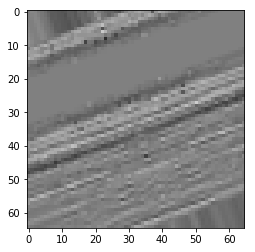

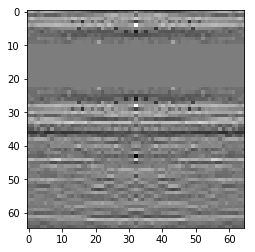

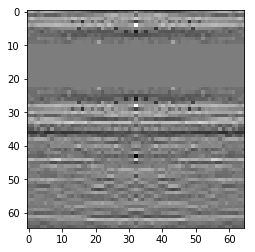

In [6]:
plt.figure()
plt.imshow(result1[0,:,:,0], vmin=-3,  vmax=3, cmap='gray')
plt.show()

plt.figure()
plt.imshow(result2[0,:,:,0], cmap='gray')
plt.show()

plt.figure()
plt.imshow(result3[0,:,:,0], cmap='gray')
plt.show()